In [12]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import imageio
import imgaug as ia
from imgaug import augmenters as iaa
from PIL import Image
import os

In [13]:
seq = iaa.Sequential([
    iaa.Rotate((-10,10)),
#     iaa.AdditiveGaussianNoise(scale=(0, 10)),
    iaa.HorizontalFlip(),
    iaa.GaussianBlur(sigma=(0,1)),
    iaa.SigmoidContrast(gain=(3, 10), cutoff=(0.4, 0.8)),
#     iaa.Crop(percent=(0, 0.2))
])

In [14]:
images_path = 'images/final/'
dest_path = 'images/AUGMENTED Final/'

for emotion_folder in os.listdir(images_path):
    try:
        os.mkdir(dest_path+emotion_folder)
    except:
        pass
    
    for file in os.listdir(images_path+emotion_folder):
        file_path = images_path + emotion_folder + '/' + file
#         image = imageio.imread(file_path)
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img = Image.fromarray(image)
        dest_file_path = dest_path + emotion_folder + '/' + file
        img.save(dest_file_path)
        for i in range(2):
            dest_file_path = dest_path + emotion_folder + '/' + file.replace('.', f'__{i}.')
            image_aug = seq(images=image)
            img = Image.fromarray(image_aug)
            img.save(dest_file_path)
    

In [10]:
seq = iaa.Sequential([
    iaa.Rotate((-10,10)),
#     iaa.AdditiveGaussianNoise(scale=(0, 10)),
    iaa.HorizontalFlip(),
    iaa.GaussianBlur(sigma=(0,1)),
    iaa.SigmoidContrast(gain=(3, 10), cutoff=(0.4, 1.0)),
#     iaa.Crop(percent=(0, 0.2))
])

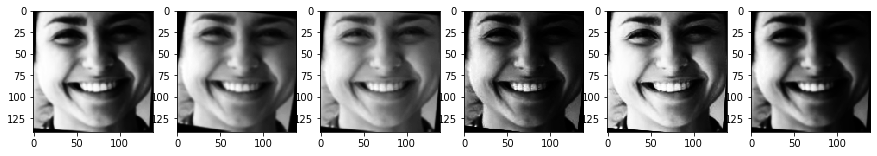

In [11]:
file_path = 'images/final/joy/0_72.jpg'
img = imageio.imread(file_path)

_, ax = plt.subplots(ncols=6, figsize=(15,15))
for i in range(6):
    image_aug = seq(images=img)
    ax[i].imshow(image_aug, cmap='gray')
plt.show()
#     img = Image.fromarray(image_aug)
#     img.save(f'{file_path}__{i}.jpg')

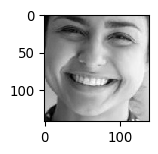

In [152]:
ia.imshow(img)